# PyData Global 2020

# An introduction to DataFrames.jl for pandas users

In the code examples I put commented out Python commands from the
[PyCon 2018: Using pandas for Better (and Worse) Data Science](https://nbviewer.jupyter.org/github/justmarkham/pycon-2018-tutorial/blob/master/tutorial.ipynb)
presentation to give you an easy mapping between Python and Julia codes.

---

Load the required packages:

in-built packages

In [1]:
using Statistics # statistical functions
using Dates      # functions and types for handling date and time

installed packages

In [2]:
using CSV        # reading and writing CSV files
using DataFrames # working with data frames
using Chain      # function chaining
using FreqTables # cross-tabulation
using PyPlot     # a binding to matplotlib (if you know matplotlib you do not have to learn anything to start plotting)

Before we start we change the default width and heights of Jupyter Notebook output

In [3]:
ENV["COLUMNS"] = 1000 # wide output is OK
ENV["LINES"] = 15 # but we do not want it to be overly tall

15

Now read-in the file

In [4]:
# ri = pd.read_csv('police.csv')
ri = CSV.read("police.csv", DataFrame)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,Missing,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-01-02,01:55:00,missing,M,1985.0,20.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-01-18,08:15:00,missing,M,1965.0,40.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-01-23,23:15:00,missing,M,1972.0,33.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-02-20,17:15:00,missing,M,1986.0,19.0,White,Call for Service,Other,0,missing,Arrest Driver,1,16-30 Min,0
5,2005-03-14,10:00:00,missing,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
6,2005-03-23,09:45:00,missing,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,0,missing,Citation,0,0-15 Min,0
7,2005-04-01,17:30:00,missing,M,1969.0,36.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
8,2005-06-06,13:20:00,missing,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
9,2005-07-13,10:15:00,missing,M,1970.0,35.0,Black,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


Note that `DataFrame` is one of the many possible tabular data formats in Julia. We could have e.g. read it in just as a `NamedTuple` (the display will not be as nice though).

In [5]:
CSV.read("police.csv", NamedTuple)

(stop_date = [Date("2005-01-02"), Date("2005-01-18"), Date("2005-01-23"), Date("2005-02-20"), Date("2005-03-14"), Date("2005-03-23"), Date("2005-04-01"), Date("2005-06-06"), Date("2005-07-13"), Date("2005-07-13")  …  Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31"), Date("2015-12-31")], stop_time = Time[Time(1, 55), Time(8, 15), Time(23, 15), Time(17, 15), Time(10), Time(9, 45), Time(17, 30), Time(13, 20), Time(10, 15), Time(15, 45)  …  Time(16, 38), Time(19, 44), Time(19, 55), Time(20, 20), Time(20, 25), Time(20, 27), Time(20, 35), Time(20, 45), Time(21, 42), Time(22, 46)], county_name = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  missing, missing, missing, missing, missing, missing, missing, missing, missing, missing], driver_gender = Union{Missing, String}["M", "M", "M", "M", "F", "M", "M", "F", "M", "M"  

Start with doing some basic inspection of the data

In [6]:
# ri.head()
first(ri, 5)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,Missing,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-01-02,01:55:00,missing,M,1985.0,20.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-01-18,08:15:00,missing,M,1965.0,40.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-01-23,23:15:00,missing,M,1972.0,33.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-02-20,17:15:00,missing,M,1986.0,19.0,White,Call for Service,Other,0,missing,Arrest Driver,1,16-30 Min,0
5,2005-03-14,10:00:00,missing,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


In [7]:
# ri.shape()
size(ri)

(91741, 15)

In [8]:
# ri.dtypes
# ri.isnull().sum()
describe(ri, :eltype, :nmissing)

,variable,eltype,nmissing
,Symbol,Type,Int64
1,stop_date,Date,0
2,stop_time,Time,0
3,county_name,Missing,91741
4,driver_gender,"Union{Missing, String}",5335
5,driver_age_raw,"Union{Missing, Float64}",5327
6,driver_age,"Union{Missing, Float64}",5621
7,driver_race,"Union{Missing, String}",5333
8,violation_raw,"Union{Missing, String}",5333
9,violation,"Union{Missing, String}",5333


Remove `"county_name"` column from `ri` in place

In [9]:
# ri.drop('county_name', axis='columns', inplace=True)
select!(ri, Not("county_name"))

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,0,missing,Arrest Driver,1,16-30 Min,0
5,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
6,2005-03-23,09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,0,missing,Citation,0,0-15 Min,0
7,2005-04-01,17:30:00,M,1969.0,36.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
8,2005-06-06,13:20:00,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
9,2005-07-13,10:15:00,M,1970.0,35.0,Black,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


DataFrames.jl provides the following basic functions for working with data frames:
    * `select`: create a new data frame with some columns from the source (possibly transformed)
    * `select!`: the same, but in-place
    * `transform`: create a new data frame keeping all columns from the source and adding some new ones
    * `transform!`: the same, but in-place
    * `combine`: aggregate (combine rows) the source
    * `filter` and `subset`: select rows from the source
    * `filter!` and `subset!`: the same, but in-place
    * `sort`: sort a data frame
    * `sort!`: the same but in-place
    * `innerjoin`, `leftjoin`, `rightjoin`, `outerjoin`, `semijoin`, `antijoin`, `crossjoin`: joins
    * `stack`/`unstack`: conversions between wide and long formats of storing data
    * `groupby`: add an index to a data frame (group it by some columns)

(there are more, but these are the most commonly used)

Get column names of our data frame

In [10]:
# ri.columns
names(ri)

14-element Vector{String}:
 "stop_date"
 "stop_time"
 "driver_gender"
 "driver_age_raw"
 "driver_age"
 ⋮
 "search_type"
 "stop_outcome"
 "is_arrested"
 "stop_duration"
 "drugs_related_stop"

Find the distribution of gender of speeding drivers:

In [11]:
# ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)
ri[isequal.(ri.violation, "Speeding"), "driver_gender"] |> proptable

3-element Named Vector{Float64}
Dim1    │ 
────────┼───────────
F       │    0.31946
M       │   0.680499
missing │ 4.12686e-5

Note that `|>` is chaining function calls

We could have also just done a cross-tabulation

In [12]:
freqtable(ri, :violation, :driver_gender)

7×3 Named Matrix{Int64}
violation ╲ driver_gender │       F        M  missing
──────────────────────────┼──────────────────────────
Equipment                 │    2487     8533        0
Moving violation          │    3204    13020        0
Other                     │     690     3627        0
Registration/plates       │    1013     2419        0
Seat belt                 │     635     2317        0
Speeding                  │   15482    32979        2
missing                   │       0        0     5333

Note that in both examples `missing` value is present in the results by default, as opposed to pandas.

In [13]:
# ri[ri.search_conducted == False].search_type.value_counts()
# ri[ri.search_conducted == False].search_type.value_counts(dropna=False)
# ri[ri.search_conducted == True].search_type.isnull().sum()
freqtable(ri, :search_type, :search_conducted)

25×2 Named Matrix{Int64}
                          search_type ╲ search_conducted │ false   true
─────────────────────────────────────────────────────────┼─────────────
Incident to Arrest                                       │     0   1219
Incident to Arrest,Inventory                             │     0    129
Incident to Arrest,Inventory,Probable Cause              │     0     34
Incident to Arrest,Inventory,Protective Frisk            │     0     11
⋮                                                              ⋮      ⋮
Protective Frisk                                         │     0    161
Protective Frisk,Reasonable Suspicion                    │     0     11
Reasonable Suspicion                                     │     0    197
missing                                                  │ 88545      0

In [14]:
freqtable(ri, :search_type, :search_conducted, skipmissing=true)

24×1 Named Matrix{Int64}
                          search_type ╲ search_conducted │ true
─────────────────────────────────────────────────────────┼─────
Incident to Arrest                                       │ 1219
Incident to Arrest,Inventory                             │  129
Incident to Arrest,Inventory,Probable Cause              │   34
Incident to Arrest,Inventory,Protective Frisk            │   11
⋮                                                             ⋮
Probable Cause,Reasonable Suspicion                      │   75
Protective Frisk                                         │  161
Protective Frisk,Reasonable Suspicion                    │   11
Reasonable Suspicion                                     │  197

Note that above in the `freqtable` call we have passed column names as `Symbol`s not strings (you can think of `Symbol`s as [interned strings](https://en.wikipedia.org/wiki/String_interning)).

Now do a simple aggregation:

In [15]:
# ri.search_conducted.mean()
mean(ri.search_conducted)

0.03483720473942948

In [16]:
# ri.groupby('driver_gender').search_conducted.mean()
@chain ri begin
    groupby("driver_gender")
    combine("search_conducted" => mean, nrow)
end

,driver_gender,search_conducted_mean,nrow
,String?,Float64,Int64
1,M,0.0433262,62895
2,F,0.0200332,23511
3,missing,0.0,5335


Things worth noting:
* we use `@chain` that enchances chaining by passing the result of the previous expression as a first argument of the next by default
* `combine` function allows you do to several transformations in one shot
* a general scheme of specifying a transformation has a form `input_columns => transformation_function => output_column` (there are many options allowing to fine-tune the transformation)

Investigate `groupby` a bit

In [17]:
gri = groupby(ri, "driver_gender")

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,0,missing,Arrest Driver,1,16-30 Min,0
5,2005-03-23,09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,0,missing,Citation,0,0-15 Min,0
6,2005-04-01,17:30:00,M,1969.0,36.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
7,2005-07-13,10:15:00,M,1970.0,35.0,Black,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
8,2005-07-13,15:45:00,M,1970.0,35.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
9,2005-07-13,16:20:00,M,1979.0,26.0,Asian,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


You can index into it using ingegers or grouping column vales (both are fast):

In [18]:
gri[2]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-06-06,13:20:00,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-07-13,19:00:00,F,1966.0,39.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-07-18,19:30:00,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
5,2005-07-24,20:10:00,F,1958.0,47.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
6,2005-07-28,12:37:00,F,1979.0,26.0,Asian,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
7,2005-08-18,10:57:00,F,1967.0,38.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
8,2005-09-21,13:30:00,F,1977.0,28.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
9,2005-09-30,09:30:00,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


In [19]:
gri[("F",)]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
,Date,Time,String?,Float64?,Float64?,String?,String?,String?,Bool,String?,String?,Bool?,String?,Bool
1,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
2,2005-06-06,13:20:00,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
3,2005-07-13,19:00:00,F,1966.0,39.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
4,2005-07-18,19:30:00,F,1984.0,21.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
5,2005-07-24,20:10:00,F,1958.0,47.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
6,2005-07-28,12:37:00,F,1979.0,26.0,Asian,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
7,2005-08-18,10:57:00,F,1967.0,38.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
8,2005-09-21,13:30:00,F,1977.0,28.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0
9,2005-09-30,09:30:00,F,1986.0,19.0,White,Speeding,Speeding,0,missing,Citation,0,0-15 Min,0


A more advanced example of chained transformation

In [20]:
# ri.stop_date.str.slice(0, 4).value_counts()
freqtable(year.(ri.stop_date))

11-element Named Vector{Int64}
Dim1  │ 
──────┼──────
2005  │  2558
2006  │ 10639
2007  │  9476
2008  │  8752
⋮           ⋮
2012  │ 10970
2013  │  7924
2014  │  9228
2015  │  8599

Note that the `.` in `year.` means that the `year` function should be applied to every element of `ri.stop_date` vector (this is called broadcasting).

In [21]:
@chain ri begin
    select(:stop_date => ByRow(year) => :year)
    groupby(:year)
    combine(nrow => :count)
end

,year,count
,Int64,Int64
1,2005,2558
2,2006,10639
3,2007,9476
4,2008,8752
5,2009,7908
6,2010,7561
7,2011,8126
8,2012,10970
9,2013,7924


In the `select` transformation specification use `ByRow` to indicate that you want to broadcast a function.

Piping can link anything. As a last example ship out the result to a plot:

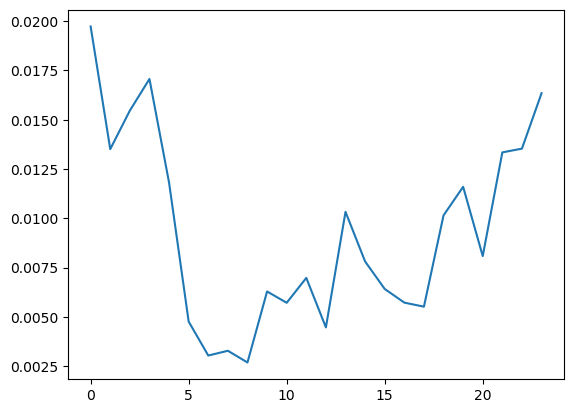

In [22]:
# ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()
@chain ri begin
    transform(:stop_time => ByRow(hour) => :hour)
    groupby(:hour, sort=true)
    combine(:drugs_related_stop => mean)
    plot(_.hour, _.drugs_related_stop_mean) # here we pass the previous result as an argument as _ explicitly
end;

### Selected noteworthy packages

* [DataFramesMeta.jl](https://github.com/JuliaData/DataFramesMeta.jl)
* [PyCall.jl](https://github.com/JuliaPy/PyCall.jl)
* [Arrow.jl](https://github.com/JuliaData/Arrow.jl)
* [MLJ.jl](https://github.com/alan-turing-institute/MLJ.jl)
* [Flux.jl](https://github.com/FluxML/Flux.jl)

and many more (you can find a more verbose list [here](https://juliadata.github.io/DataFrames.jl/latest/#DataFrames.jl-and-the-Julia-Data-Ecosystem))

# Thank you!